In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow.keras.layers import (Dense,
                                     LeakyReLU,
                                     Reshape,
                                     Input,
                                     Conv2D,
                                     Dropout,
                                     Flatten)


from tensorflow.keras.utils import plot_model
from keras.optimizers import Adam
from keras.models import Model, Sequential
import math
import time

Importing MNIST Dataset

In [ ]:
(X, y), (X_test, _) = tf.keras.datasets.mnist.load_data()
traindata = np.vstack( (X, X_test))
traindata = X.astype('float32')
traindata = (X - 127.5) /127.5 #[-1,1]

Splitting data for Training and Testing purpose in 80:20 ratio:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)
print('x_test:', X_test.shape)

X_train: (48000, 28, 28)
y_train: (48000,)
X_validation: (12000, 28, 28)
y_validation: (12000,)
x_test: (10000, 28, 28)


28x28 px = 784px

*one* out of 48000 images

In [ ]:
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


few images of train dataset

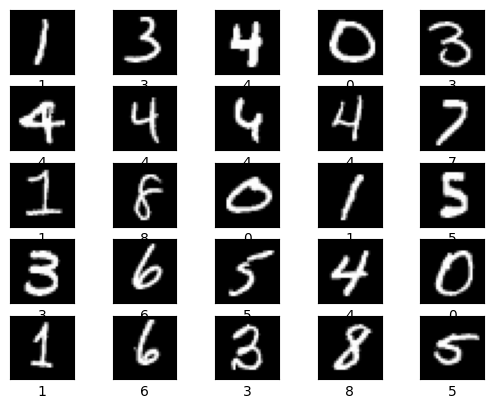

In [ ]:
num_to_display = 25
num_of_cells = math.ceil(math.sqrt(num_to_display))
for i in range(num_to_display):
  plt.subplot(num_of_cells,num_of_cells,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i],cmap='binary_r')
  plt.xlabel(y_train[i])
plt.show()

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. We need to reshape it to (28, 28, 1) shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [ ]:
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_CHANNELS = 1

X_train_with_chanels = X_train.reshape(
    X_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

X_validation_with_chanels = X_validation.reshape(
    X_validation.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

X_test_with_chanels = X_test.reshape(
    X_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

shape of x_train,x_validation and x_test

In [ ]:
print('x_train_with_chanels:', X_train_with_chanels.shape)
print('x_validation_with_chanels:', X_validation_with_chanels.shape)
print('x_test_with_chanels:', X_test_with_chanels.shape)

x_train_with_chanels: (48000, 28, 28, 1)
x_validation_with_chanels: (12000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [ ]:
X_train_with_chanels[0][10]

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [ 55],
       [254],
       [233],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0]], dtype=uint8)

Normalize train, test, and validation data: [0,1]

In [ ]:
X_train_normalized = X_train_with_chanels / 255
X_validation_normalized = X_validation_with_chanels / 255
X_test_normalized = X_test_with_chanels / 255

checking

In [ ]:
X_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.21568627],
       [0.99607843],
       [0.91372549],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

We are using Sequential Keras model which have two pairs of Convolution2D and MaxPooling2D layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use Flatten layer to convert multidimensional parameters to vector.

The last layer will be a Dense layer with 10 Softmax outputs.

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()

))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

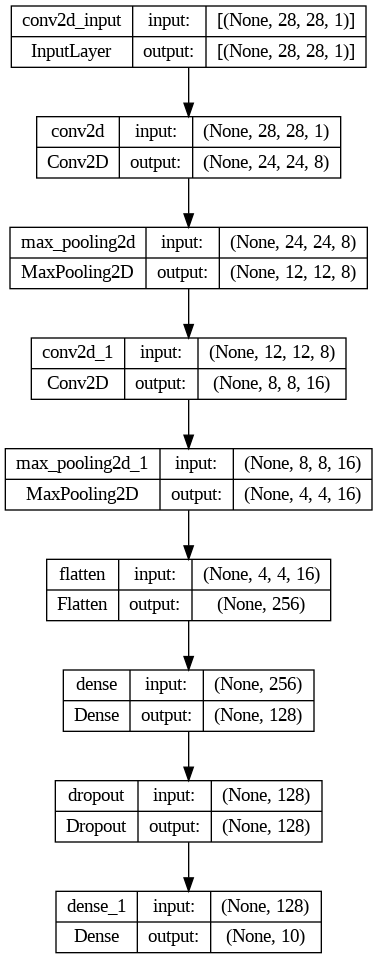

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
import datetime
import platform


log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    X_train_normalized,
    y_train,
    epochs=10,
    validation_data=(X_validation_normalized, y_validation),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1500/1500 [==============================] - 37s 22ms/step - loss: 0.2393 - accuracy: 0.9259 - val_loss: 0.0898 - val_accuracy: 0.9713
Epoch 2/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0822 - accuracy: 0.9740 - val_loss: 0.0637 - val_accuracy: 0.9788
Epoch 3/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0560 - val_accuracy: 0.9830
Epoch 4/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0518 - val_accuracy: 0.9842
Epoch 5/10
1500/1500 [==============================] - 29s 20ms/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0473 - val_accuracy: 0.9843
Epoch 6/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.0418 - val_accuracy: 0.9884
Epoch 7/10
1500/1500 [==============================] - 29s 20ms/step - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.0414 -

In [ ]:
train_loss, train_accuracy = model.evaluate(X_train_normalized, y_train)

print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

1500/1500 [==============================] - 10s 7ms/step - loss: 0.0101 - accuracy: 0.9964
Train loss:  0.010069949552416801
Train accuracy:  0.9963541626930237


In [ ]:
validation_loss, validation_accuracy = model.evaluate(X_validation_normalized, y_validation)

print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

375/375 [==============================] - 2s 6ms/step - loss: 0.0489 - accuracy: 0.9884
Validation loss:  0.048940058797597885
Validation accuracy:  0.9884166717529297


In [ ]:
y_validation_pred = model.predict(X_validation_normalized)

375/375 [==============================] - 2s 6ms/step


In [ ]:
y_validation_pred.shape

(12000, 10)

In [ ]:
pd.DataFrame(y_validation_pred)

,0,1,2,3,4,5,6,7,8,9
0,2.692498e-18,1.829214e-10,1.123108e-09,9.999999e-01,7.480879e-18,3.564478e-10,2.329033e-19,1.522623e-08,8.327627e-09,1.123158e-11
1,6.840922e-14,1.981717e-11,9.999999e-01,2.214743e-13,2.268141e-18,7.480362e-19,1.868409e-12,6.577898e-10,5.670133e-18,5.910217e-17
2,2.041275e-12,2.283534e-14,1.156636e-11,1.360119e-13,1.743093e-09,4.807995e-11,1.682116e-17,9.999999e-01,3.652067e-12,4.540572e-09
3,1.159460e-12,5.051652e-10,1.473916e-10,1.546221e-08,7.164216e-12,7.293092e-10,4.269624e-09,1.831642e-15,9.999999e-01,1.331596e-12
4,1.749747e-14,1.459869e-09,9.999999e-01,1.416779e-12,2.057760e-16,6.767422e-16,1.047203e-08,1.519211e-09,1.934710e-16,1.540472e-18
...,...,...,...,...,...,...,...,...,...,...
11995,2.339574e-12,2.806189e-03,1.738850e-12,8.445569e-07,9.417881e-12,9.971920e-01,2.910771e-11,2.482730e-11,6.420131e-09,9.649596e-07
11996,7.460688e-11,9.999982e-01,1.572198e-08,4.055849e-11,5.182234e-07,1.306460e-07,5.944216e-07,6.312818e-07,7.904331e-09,2.773158e-08
11997,9.999999e-01,5.517609e-19,6.215756e-15,1.221430e-18,1.466094e-17,5.795963e-12,4.160092e-11,2.272291e-16,3.130069e-17,9.718873e-13
11998,9.999999e-01,9.959606e-16,8.900510e-13,7.252578e-16,4.151370e-16,6.209032e-09,2.603535e-09,9.734281e-15,3.885863e-16,1.831561e-12


In [ ]:
y_validation_pred = np.argmax(y_validation_pred,axis=1)

In [ ]:
pd.DataFrame(y_validation_pred)

,0
0,3
1,2
2,7
3,8
4,2
...,...
11995,5
11996,1
11997,0
11998,0


In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_validation, y_validation_pred)

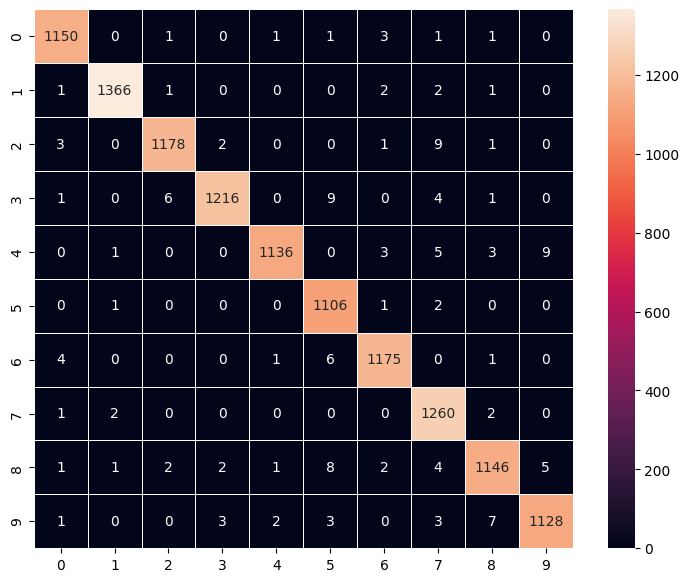

In [ ]:
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

unseen data (test.csv)

In [ ]:
y_test_pred = model.predict(X_test_normalized)

313/313 [==============================] - 2s 6ms/step


In [ ]:
pd.DataFrame(y_test_pred)

,0,1,2,3,4,5,6,7,8,9
0,2.391426e-17,3.369012e-13,3.107150e-10,3.591724e-13,3.412504e-17,1.201537e-15,1.650691e-22,9.999999e-01,1.005988e-15,1.732027e-13
1,7.458972e-08,1.040007e-09,9.999993e-01,6.380467e-13,4.367545e-14,2.198159e-14,4.556446e-07,4.540833e-15,6.299469e-14,1.872284e-14
2,7.967692e-10,9.999776e-01,2.790775e-07,3.105937e-10,5.557603e-07,1.019806e-06,1.213010e-05,5.957473e-06,2.159830e-06,4.731668e-08
3,9.999997e-01,3.149186e-15,3.225102e-12,4.515045e-12,1.213499e-15,1.904354e-09,2.091797e-07,9.698742e-13,9.681454e-11,9.566252e-11
4,7.960466e-11,2.130431e-08,7.129104e-11,1.418335e-11,9.999539e-01,3.428470e-12,2.037392e-09,2.301299e-10,4.593974e-08,4.595778e-05
...,...,...,...,...,...,...,...,...,...,...
9995,2.676935e-15,5.036742e-09,9.999999e-01,1.036838e-12,3.261067e-19,4.541103e-19,2.088986e-15,8.010876e-09,1.333862e-14,3.511197e-18
9996,2.304043e-14,4.660687e-08,3.926218e-09,9.999996e-01,1.600523e-19,2.856161e-07,1.017041e-18,1.432736e-08,1.242434e-12,1.040106e-12
9997,3.553033e-18,8.804395e-11,4.306230e-17,9.437118e-17,9.999999e-01,5.531788e-13,2.334868e-12,2.908577e-13,3.260348e-10,3.367405e-10
9998,3.245627e-12,5.999012e-16,1.207968e-20,2.560720e-11,2.051018e-18,9.999999e-01,1.200924e-12,5.314610e-15,5.555665e-09,2.601012e-14


In [ ]:
y_test_pred = np.argmax(y_test_pred,axis=1)

In [ ]:
pd.DataFrame(y_test_pred)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


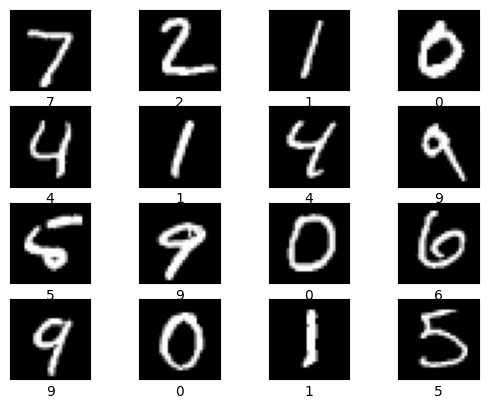

In [ ]:
num_to_display = 16
num_of_cells = math.ceil(math.sqrt(num_to_display))
for i in range(num_to_display):
  plt.subplot(num_of_cells,num_of_cells,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test_normalized[i],cmap='binary_r')
  plt.xlabel(y_test_pred[i])
plt.show()

In [ ]:
epochs = 80
batch_size = 256
half_batch = batch_size//2
n = 100
losses = []

Generator model

In [ ]:
def generator_model(n):
  inp = Input(shape=(n))
  x = Dense(236, activation=LeakyReLU(alpha=0.2))(inp)
  x = Dense (512, activation=LeakyReLU(alpha=0.2))(x)
  x = Dense (1024, activation=LeakyReLU(alpha=0.2))(x)
  x = Dense (784, activation='tanh')(x)
  op = Reshape( (28,28, 1))(x)
  return Model(inp, op)

In [ ]:
gener = generator_model(100)
gener.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_20 (Dense)            (None, 236)               23836     
                                                                 
 dense_21 (Dense)            (None, 512)               121344    
                                                                 
 dense_22 (Dense)            (None, 1024)              525312    
                                                                 
 dense_23 (Dense)            (None, 784)               803600    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 1,474,092
Trainable params: 1,474,092
Non-tra

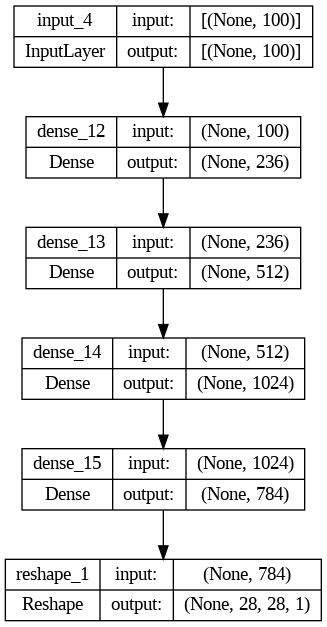

In [ ]:
plot_model(gener, show_shapes=True, show_layer_names=True)

Discriminator model

In [ ]:
def discriminator_model() :
 inp = Input(shape= (28, 28, 1))
 x = Flatten()(inp)
 x = Dropout(0.4)(x)
 x = Dense (1024, activation=LeakyReLU(alpha=0.2))(x)
 x = Dropout (0.4)(x)
 x = Dense (512, activation=LeakyReLU(alpha=0.2))(x)
 x = Dropout (0.4)(x)
 x = Dense (512, activation=LeakyReLU(alpha=0.2))(x)
 op = Dense (1, activation="sigmoid")(x)
 model = Model(inp,op)
 model.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss="binary_crossentropy")
 return model

In [ ]:
discrim = discriminator_model()
discrim.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dropout_9 (Dropout)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0   

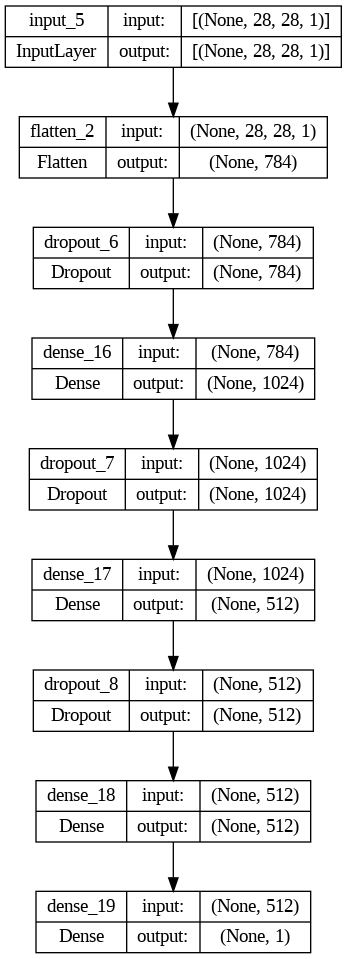

In [ ]:
plot_model(discrim, show_shapes=True, show_layer_names=True)

In [ ]:
def gan(discrim, gen):
  discrim.trainable = False
  model = Sequential()
  model.add(gen)
  model.add(discrim)
  model.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss="binary_crossentropy")
  return model

In [ ]:
gan_model = gan(discrim, gener)

Training Loop:
real data (xreal) and fake/generated data (xfake) using the generator model.
real (yreal) and fake (yfake) data
combines the real and fake data and labels to create the training data (xfinal and yfinal)

In [ ]:
for i in range (epochs) :
  start = time.time()
  print ("EPOCH", i)
  for j in (range(len(traindata)//batch_size)):
    xreal, yreal = traindata[np.random.randint(0,len(traindata),half_batch)].reshape(half_batch, 28,28,1), np.ones(half_batch).reshape(half_batch,1)

    xfake, yfake = gener.predict(np.random.randn(half_batch, n),verbose=0),np.zeros(half_batch).reshape(half_batch, 1)

    xfinal, yfinal = np.vstack((xreal,xfake)),np.vstack((yreal,yfake))

    dloss = discrim.train_on_batch(xfinal, yfinal)

    gloss = gan_model.train_on_batch(np.random.randn(batch_size, n), np.ones(batch_size).reshape(batch_size, 1))

    losses.append([dloss, gloss])

  fig,axes = plt.subplots(5,5, figsize=(12, 12))
  print("losses ->", dloss," ", gloss)
  for ii in range (5):
    for jj in range(5):
      axes[ii, jj].imshow(gener.predict(np.random.randn(1*n).reshape(1, n),verbose=0).reshape(28,28), cmap= 'gray')

  print ('Time for epoch {} is {} sec'.format(i + 1, time.time()-start))

  plt. show()
  plt.close()

Output hidden; open in https://colab.research.google.com to view.